# Матреиалы:
* [Презинтация](https://disk.yandex.ru/i/p6mu1oUL3Vqaiw)


# Анализ рекламных источников

# Задача**:**

Проанализируйте поведения игроков в зависимости от источника перехода.

- Проведите исследовательский анализ данных;
- Проанализируйте влияние источника перехода в игру на поведение пользователя;
- Проверьте статистические гипотезы
    1. *Проверьте гипотезу: время завершения уровня различается в зависимости способа прохождения:*
        - *через реализацию проекта,*
        - *через победу над первым игроком.*
    2. *Количество построек не зависит от способа прохождения уровня*
       - *через реализацию проекта,*
       - *через победу над первым игроком.*

Основной датасет содержит данные о событиях, совершенных в мобильной игре «Космические братья». В ней пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики.

Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:

- Победа над первым врагом
- Реализация проекта - разработка орбитальной сборки спутников

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

# Содержание: 

**1. Знакомство с даннымии, первичные выводы о предстоящей работе**

**2. Предобработка дынных**

**3. Исследовательский анализ данных**


**4. Статистический анализ данных**


**5. Вывод**


# Библиотеки:

In [1]:
import pandas as pd

import plotly.express as px

from plotly import graph_objects as go

import matplotlib.pyplot as plt

import seaborn as sns

import datetime as dt

from scipy import stats as st

import warnings
pd.set_option('display.max_colwidth', 150)
warnings.filterwarnings('ignore')

#  Знакомство с даннымии, первичные выводы о предстоящей работе

In [2]:
data_game = pd.read_csv('/datasets/game_actions.csv')
user_source = pd.read_csv('/datasets/user_source.csv')
ad_costs = pd.read_csv('/datasets/ad_costs.csv')

In [3]:
def dataset_info(data):
    display(data.head()),
    print(),
    print(data.info()),
    print(),
    print('Пропуски:'),
    print(),
    print(data.isna().sum())

**data_game**

In [4]:
dataset_info(data_game)

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB
None

Пропуски:

event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133774
dtype: int64


**user_source**

In [5]:
dataset_info(user_source)

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB
None

Пропуски:

user_id    0
source     0
dtype: int64


**ad_costs**

In [6]:
dataset_info(ad_costs)

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes
None

Пропуски:

source    0
day       0
cost      0
dtype: int64


Пропуски имеются лишь в файле - game_actions, переменная "data_game". По всем остальным доступным данным данные без пропусков. 

# Предобработка дынных

In [7]:
#data_game = data_game.dropna(subset=['building_type'])
#data_game.info()

При выполнении команды на удаление строк с пропусками по столбцу "building_type", в столбце "project_type" количество строк равно "0".

Данные заполнялись автоматически по принципу:

При завершении уровня через проект, в столбец "building_type" данные не заполняются

При постройке здания в столбец "project_type" данные не заполняются

При нажатии игроком кнопки о завершении уровня ничего не записывается в столбцы "project_type" и "building_type"

**Рассмотрим данне подробнее:**

Событие **building**

In [8]:
print('Количество событий - building', data_game.query('event == "building"').shape[0])

Количество событий - building 127957


Посмотрим пропуски:

In [9]:
data_game.query('event == "building"').isna().sum().sort_values(ascending=False)

project_type      127957
event_datetime         0
event                  0
building_type          0
user_id                0
dtype: int64

Посмотрим на тип события **building**

In [66]:
data_game.query('event == "building"')['building_type'].value_counts()

spaceport          59325
assembly_shop      54494
research_center    14138
Name: building_type, dtype: int64

По событию **building**, пропуски есть только **project_type**, что соответсвует способу заполнения данных. Типы построек соответствуют описанию данных.

Событие **project**

In [73]:
print('Количество событий - project', data_game.query('event == "project"').shape[0])

Количество событий - project 1866


In [74]:
data_game.query('event == "project"').isna().sum().sort_values(ascending=False)

building_type     1866
event_datetime       0
event                0
user_id              0
project_type         0
source               0
date                 0
week                 0
weekday              0
hour                 0
progress             0
dtype: int64

In [75]:
data_game.query('event == "project"')['project_type'].value_counts()

satellite_orbital_assembly    1866
Name: project_type, dtype: int64

По событию **project**, пропуски есть только в типах построек, что соответсвует способу заполнения данных. имеется только один тип проекта, что соответствуют описанию данных.

Таким образом пропуски удалять не нужно, их наличие обусловлено способом записи даных, лишних и неуместных пропусков нет.

In [10]:
data_game['event_datetime'] = pd.to_datetime(data_game['event_datetime'], format='%Y-%m-%d %H:%M:%S')
ad_costs['day'] = pd.to_datetime(ad_costs['day'], format='%Y-%m-%d')
# Меняем тип данных в стиолбцах со временем.

In [11]:
ad_costs.rename(columns = {'day':'date'}, inplace = True)
# Переименуем столбец

# Исследовательский анализ данных

Посчитаем пользователей по каналам привлечения.  

In [12]:
data_game = data_game.merge(user_source, how='left', on='user_id')
# Объеденим таблицы по "user_id"

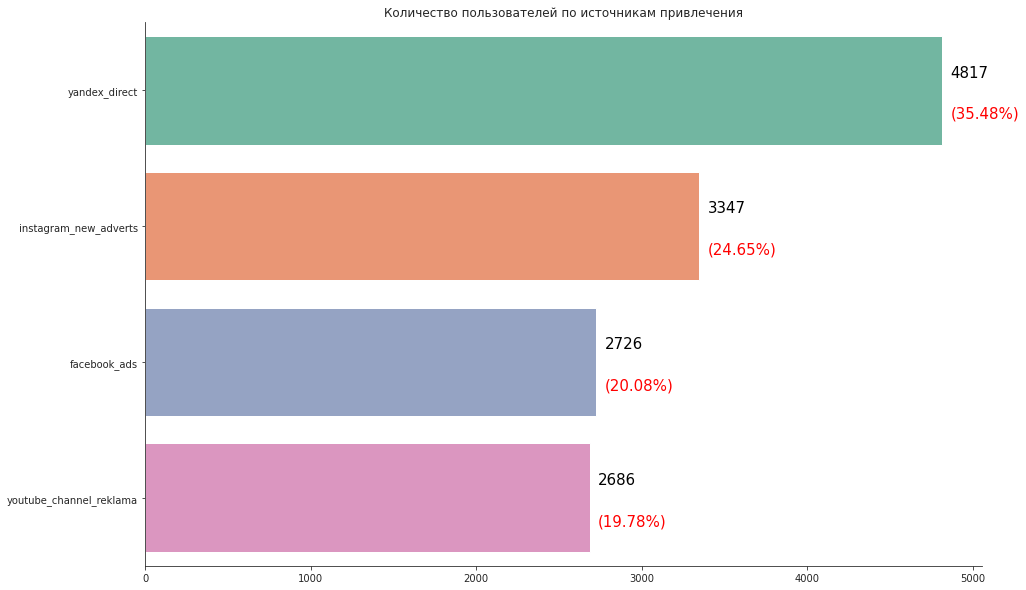

,user_count,event_count,events_per_user
source,,,
yandex_direct,4817,47694,9.901183
instagram_new_adverts,3347,33757,10.085748
facebook_ads,2726,27672,10.151137
youtube_channel_reklama,2686,26517,9.872301


In [13]:
source = data_game.groupby('source').agg(user_count = ('user_id', 'nunique'), event_count = ('user_id', 'count'))
source['events_per_user'] = source['event_count'] / source['user_count']
source = source.sort_values('user_count', ascending=False)


sns.set_style("ticks")
plt.figure(figsize=(15, 10))
plt.title('Количество пользователей по источникам привлечения')
sns.barplot(y=source.index, x=source['user_count'], palette='Set2', orient='h')


for i, b in enumerate(source['user_count'].values):
    plt.text(b + 50, i - 0.1, str(b), color='black', fontsize = 15)
    plt.text(b + 50, i + 0.2, '({:.2%})'.format(b / source['user_count'].sum()), color='red', fontsize = 15)

    
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.show()

display(source)

- Больщая часть игроков пришла с "Яндекс директ", затем идет "instagram", "facebook" и "youtube" соответственно. 
- Разница между колиеством событий на игрока не критична. В среднем количество построе на игрока в районе "10", вне зависимости от источника.

Рассмотрим активность игроков по периодам

In [14]:
data_game['date'] = data_game['event_datetime'].dt.date
data_game['week'] = data_game['event_datetime'].dt.week
data_game['weekday'] = data_game['event_datetime'].dt.day_name()
data_game['hour'] = data_game['event_datetime'].dt.hour

In [15]:
data_game.head()

,event_datetime,event,building_type,user_id,project_type,source,date,week,weekday,hour
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-04,19,Monday,0
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,facebook_ads,2020-05-04,19,Monday,0
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,instagram_new_adverts,2020-05-04,19,Monday,0
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,facebook_ads,2020-05-04,19,Monday,0
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,yandex_direct,2020-05-04,19,Monday,0


In [16]:
def period_source(data, period, name):  
    users = (data.groupby(period)
                  .agg(
                      user_count = ('user_id','nunique'),
                      event_count = ('user_id','count'))
             )
    users['events_per_user'] = users['event_count'] /  users['user_count']
    users = users.sort_values(by=period)
    users[['user_count', 'event_count']].plot(figsize=(15,5), 
                                              kind='bar', 
                                              grid=True, 
                                              title='Количество игроков и событий в '+ name, color= {'blue', 'red'})
    
    display(users.describe())
    
    plt.xlabel('')
    plt.ylabel('Количество игроков и событий')
    plt.legend(['Игроки','события'])
    plt.show()

    plt.figure(figsize=(15,10))
    sns.distplot(users['user_count'], bins=10, label='Игроки', color='red')
    sns.distplot(users['event_count'], bins=10, label='События', color='blue')
    
    plt.title('Распределение количества игроков и событий в ' + name)
    plt.xlabel('')
    plt.legend()
    plt.show() 
    

**День**

,user_count,event_count,events_per_user
count,33.000000,33.000000,33.000000
mean,2884.878788,4110.303030,1.333487
std,3083.784493,4639.789054,0.106311
min,4.000000,5.000000,1.215385
25%,91.000000,118.000000,1.252160
50%,1480.000000,1837.000000,1.296703
75%,5776.000000,7918.000000,1.370845
max,9219.000000,15208.000000,1.649637


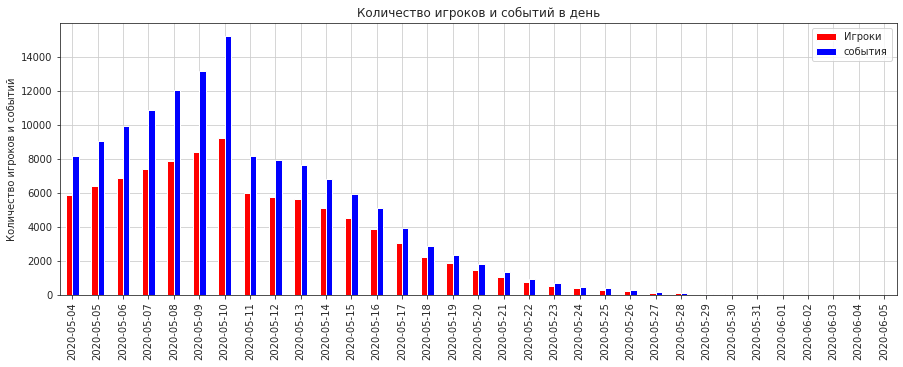

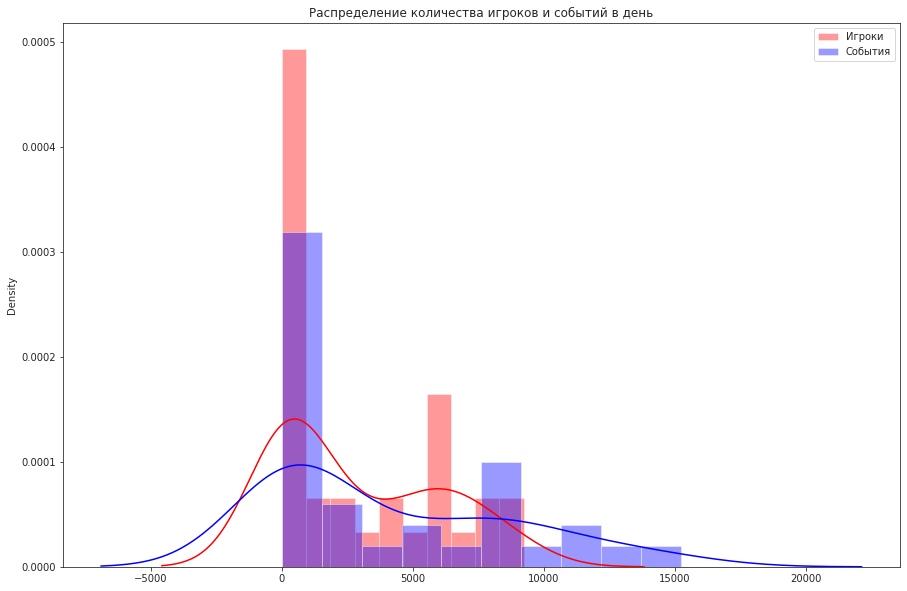

In [17]:
period_source(data_game, ['date'], 'день')

Четко выражен спад после первой недели, среднее количество игроков - 2885. 

Среднее количество событий на игрока - 1.33

**Неделя**

,user_count,event_count,events_per_user
count,5.00000,5.000000,5.000000
mean,6120.00000,27128.000000,3.230714
std,6387.00454,34115.600977,1.578545
min,29.00000,61.000000,2.099808
25%,521.00000,1094.000000,2.103448
50%,4353.00000,10517.000000,2.416035
75%,12121.00000,45563.000000,3.759013
max,13576.00000,78405.000000,5.775265


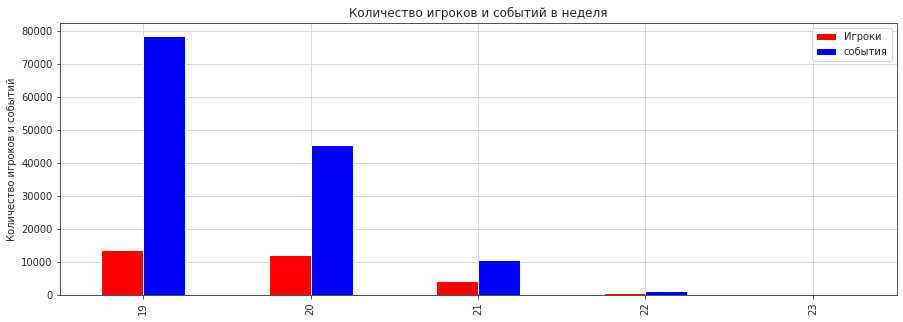

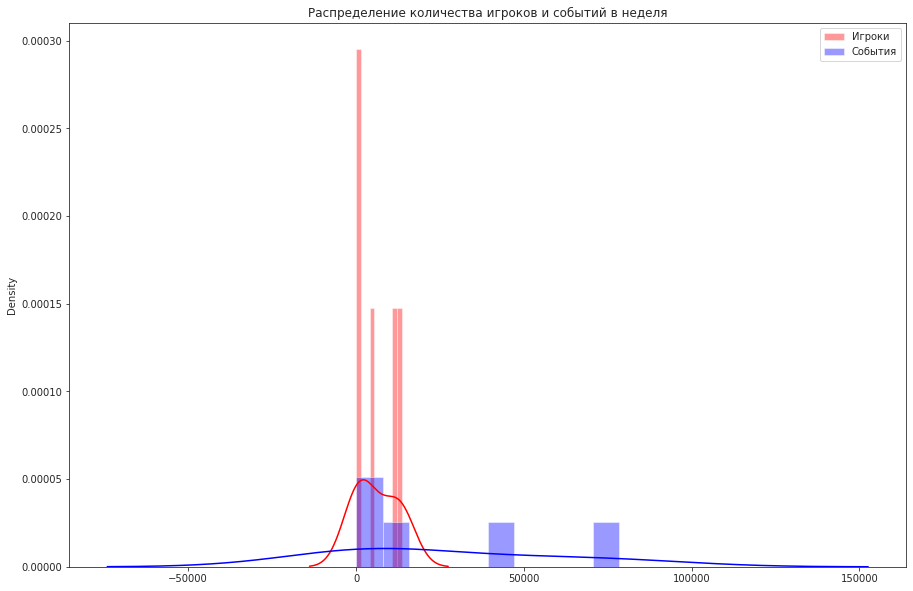

In [18]:
period_source(data_game, ['week'], 'неделя')

От недели к неделе заметен спад количество игроков, так же заметен сильный спад количества событий между первой и второй неделей  

**День недели**

,user_count,event_count,events_per_user
count,7.000000,7.000000,7.000000
mean,9973.571429,19377.142857,1.942778
std,68.970663,297.283495,0.019714
min,9868.000000,18979.000000,1.918102
25%,9941.500000,19113.500000,1.925183
50%,9958.000000,19569.000000,1.946798
75%,10022.500000,19591.000000,1.959513
max,10061.000000,19683.000000,1.965154


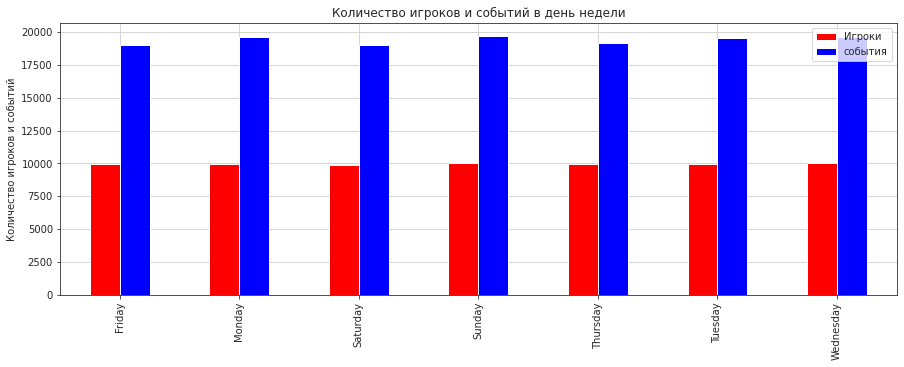

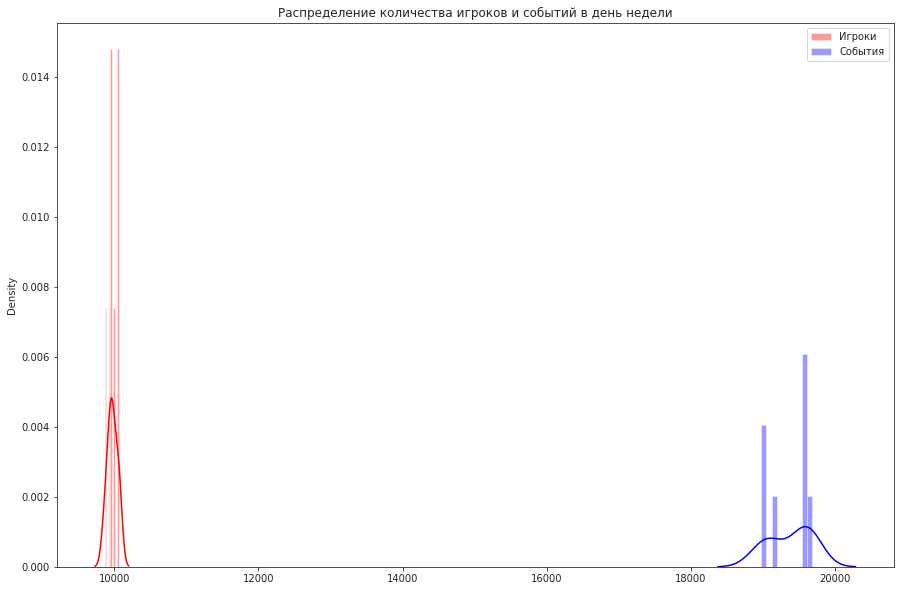

In [19]:
period_source(data_game, ['weekday'], 'день недели')

День недели существенно не влияет на активность игроков

**Час**

,user_count,event_count,events_per_user
count,24.000000,24.000000,24.000000
mean,4570.916667,5651.666667,1.236452
std,53.322576,69.617381,0.007240
min,4484.000000,5536.000000,1.218393
25%,4539.500000,5596.250000,1.232755
50%,4562.000000,5636.500000,1.235901
75%,4613.250000,5686.000000,1.241830
max,4676.000000,5771.000000,1.250650


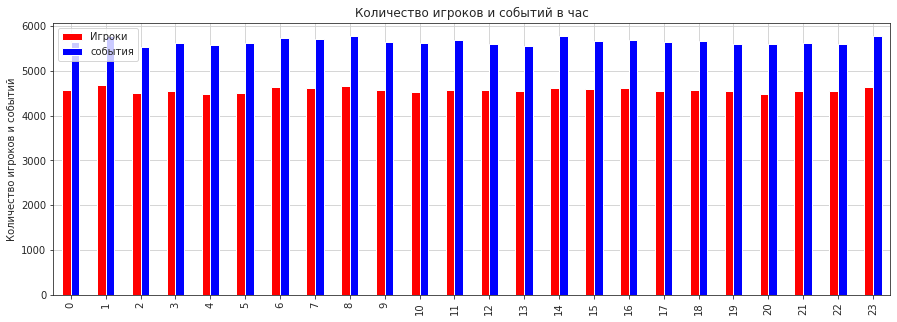

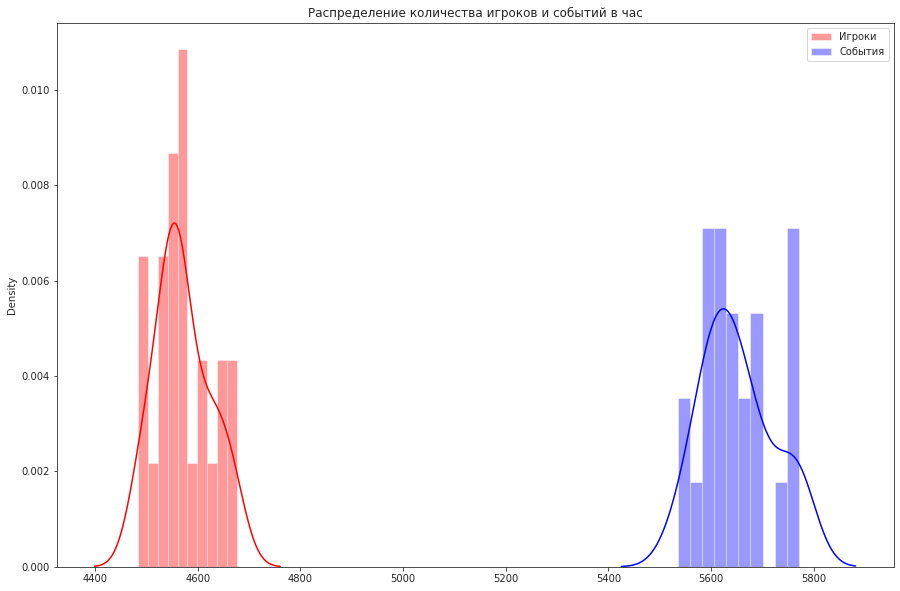

In [20]:
period_source(data_game, ['hour'], 'час')

Активность игроков чуть выше в вечернее время (23:00), дневное (14:00) и рано утром (06:00), но в целом довольно равномерно распределено. Нам неизвестно географическое положение игроков, вероятно они находятся в разных часовых поясах.

Игроки могут пройти первый уровень, путем:

- Победа над первым врагом (игроком) - PvP
- Реализация проекта - PvE 

У игрока прошедшего первый уровень есть событие 'finished_stage_1'. У игроков, прошедших уровень путём реализации проекта, встречается событие 'project. Игроки, имеющие событие finished_stage_1, но не имеющие project, прошли уровень посредством победы над другим игроком.

In [21]:
def pve_pvp(data):
    player_finish_count = data[data['event'] == 'finished_stage_1']['user_id'].count()
    pve_player = data[data['project_type'] == 'satellite_orbital_assembly']['user_id'].count()
    pvp_player =  player_finish_count - pve_player
    print('Всего игроков, прошедших первый уровень:', player_finish_count)
    print('Игроки прошедшие первый уровень путём реализация проекта:', pve_player)
    print('Игроки прошедшие первый уровень путём победы над другим игроком:', pvp_player)


    player_style  = pd.Series([pve_player, pvp_player], index=['PvE','PvP'])
    
    mycolors = ['blue', 'red']
    pie, ax = plt.subplots(figsize=[15,10])
    labels = player_style.keys()
    plt.pie(x=player_style, autopct="%.1f%%", explode=[0.05, 0.05], labels=labels, pctdistance=0.6, shadow = True, colors =  mycolors)
    plt.title("Игроки, прошедшие уровень:", fontsize=20);

    plt.show()

Всего игроков, прошедших первый уровень: 5817
Игроки прошедшие первый уровень путём реализация проекта: 1866
Игроки прошедшие первый уровень путём победы над другим игроком: 3951


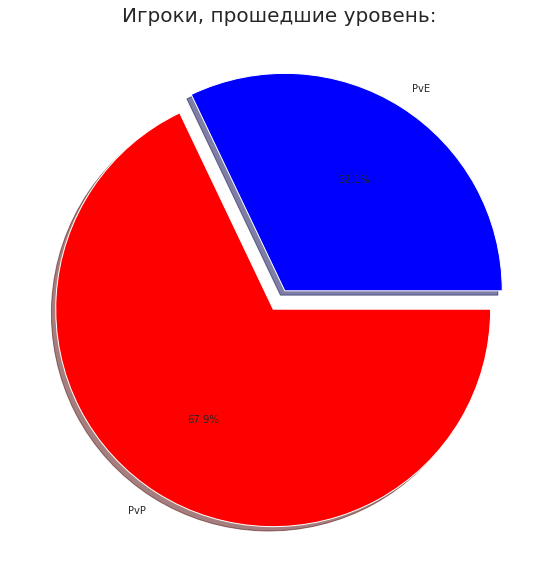

In [22]:
pve_pvp(data_game)

Практически 2/3 игроков предпочетают PvP

Посмотрим на выбор игроков привлеченных пришедших от разных источников

In [23]:
yandex_direct = data_game[data_game['source'] == 'yandex_direct']
instagram = data_game[data_game['source'] == 'instagram_new_adverts']
facebook = data_game[data_game['source'] == 'facebook_ads']
youtube = data_game[data_game['source'] == 'youtube_channel_reklama']

**Яндекс Директ**

Всего игроков, прошедших первый уровень: 2042
Игроки прошедшие первый уровень путём реализация проекта: 620
Игроки прошедшие первый уровень путём победы над другим игроком: 1422


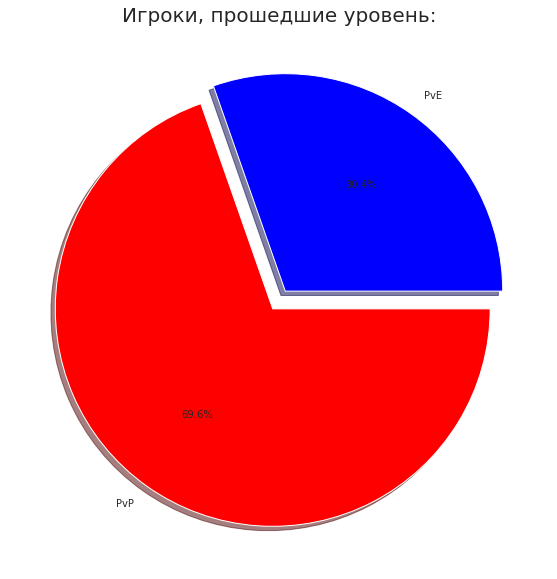

In [24]:
pve_pvp(yandex_direct)

**instagram**

Всего игроков, прошедших первый уровень: 1466
Игроки прошедшие первый уровень путём реализация проекта: 476
Игроки прошедшие первый уровень путём победы над другим игроком: 990


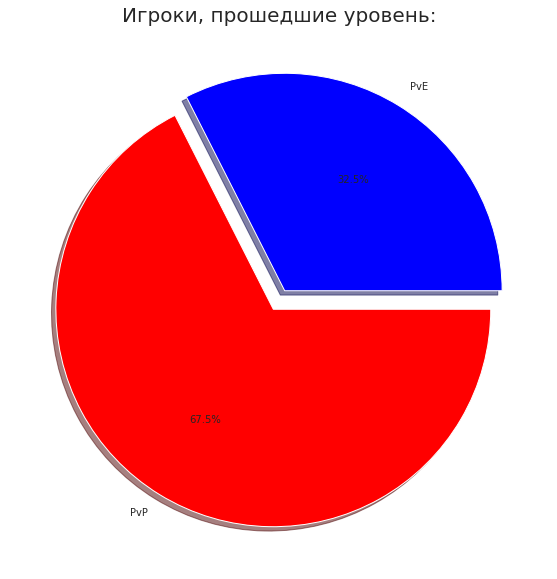

In [25]:
pve_pvp(instagram)

**facebook**

Всего игроков, прошедших первый уровень: 1150
Игроки прошедшие первый уровень путём реализация проекта: 391
Игроки прошедшие первый уровень путём победы над другим игроком: 759


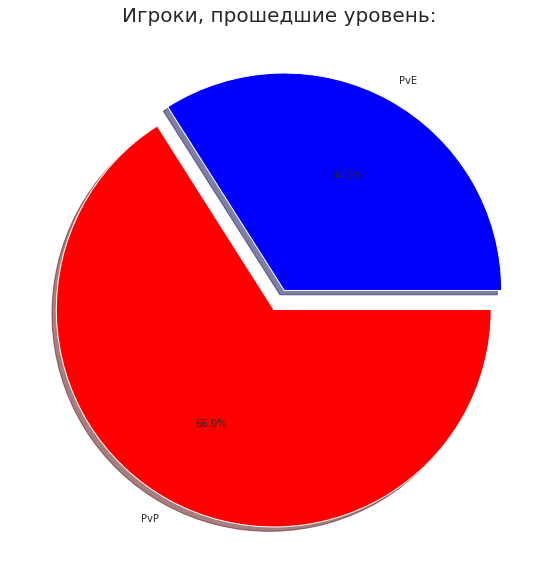

In [26]:
pve_pvp(facebook)

**youtube**

Всего игроков, прошедших первый уровень: 1159
Игроки прошедшие первый уровень путём реализация проекта: 379
Игроки прошедшие первый уровень путём победы над другим игроком: 780


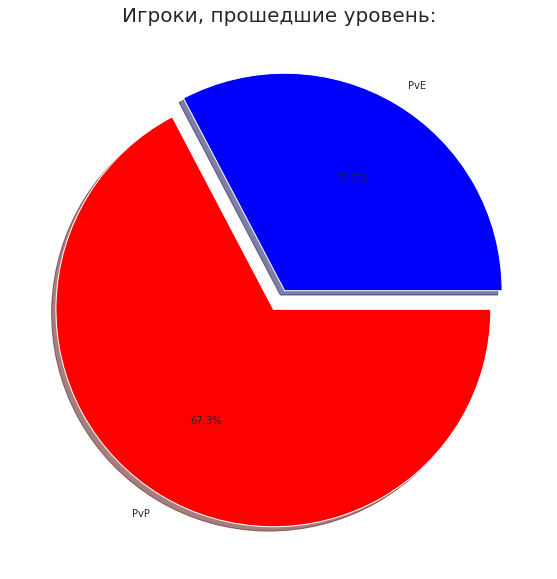

In [27]:
pve_pvp(youtube)

В целом, способы завершения первого уровня у всех игроков распределены приблизительно одинаково, независимо от источника привлечения.

**Посмотрим какие постройки чаще всего строили игроки**

In [28]:
def bulding_type(data):
    spaceport = data[data['building_type'] == 'spaceport']['user_id'].count()
    assembly_shop = data[data['building_type'] == 'assembly_shop']['user_id'].count()
    research_center = data[data['building_type'] == 'research_center']['user_id'].count()
    print('Всего построек типа - spaceport:', spaceport)
    print('Всего построек типа - assembly_shop:', assembly_shop)
    print('Всего построек типа - research_center:', research_center)
    
    bulding_style = pd.Series([spaceport, assembly_shop, research_center], index=['spaceport','assembly_shop','research_center'])
    
    colors = ['blue', 'red', 'green']
    pie, ax = plt.subplots(figsize=[15,10])
    labels = bulding_style.keys()
    plt.pie(x=bulding_style, autopct="%.1f%%", explode=[0.05, 0.05, 0.05], labels=labels, pctdistance=0.6, shadow = True, colors =  colors)
    plt.title("Построики игроков:", fontsize=20);

    plt.show()

Всего построек типа - spaceport: 59325
Всего построек типа - assembly_shop: 54494
Всего построек типа - research_center: 14138


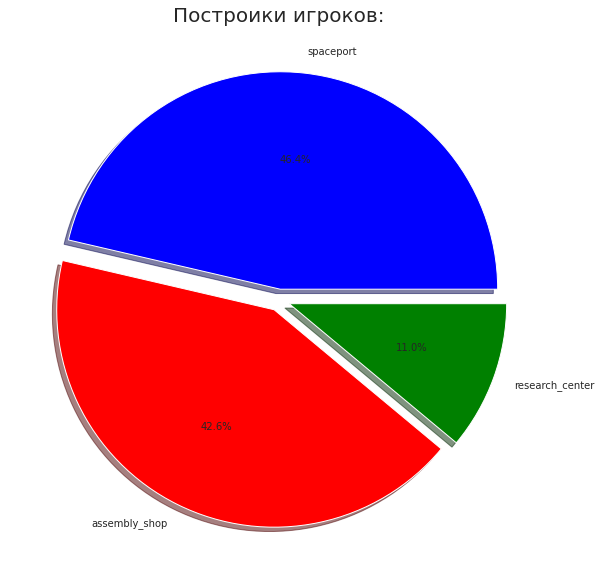

In [29]:
bulding_type(data_game)

**Постройки в зависимости от источника**

**Яндекс Директ**

Всего построек типа - spaceport: 20785
Всего построек типа - assembly_shop: 19295
Всего построек типа - research_center: 4952


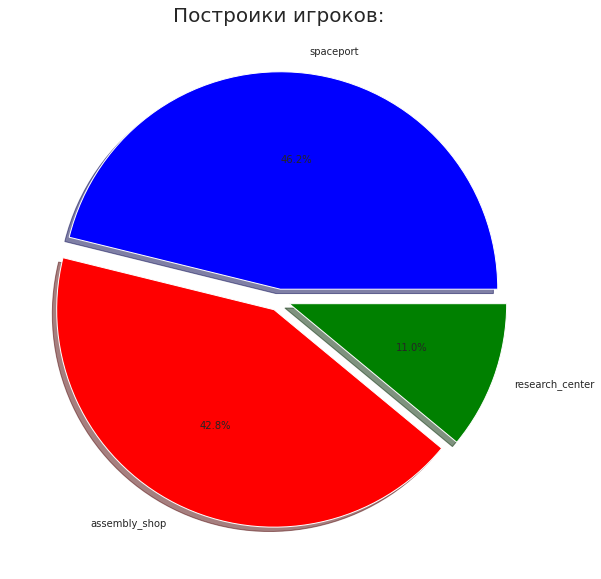

In [30]:
bulding_type(yandex_direct)

**facebook**

Всего построек типа - spaceport: 12069
Всего построек типа - assembly_shop: 11117
Всего построек типа - research_center: 2945


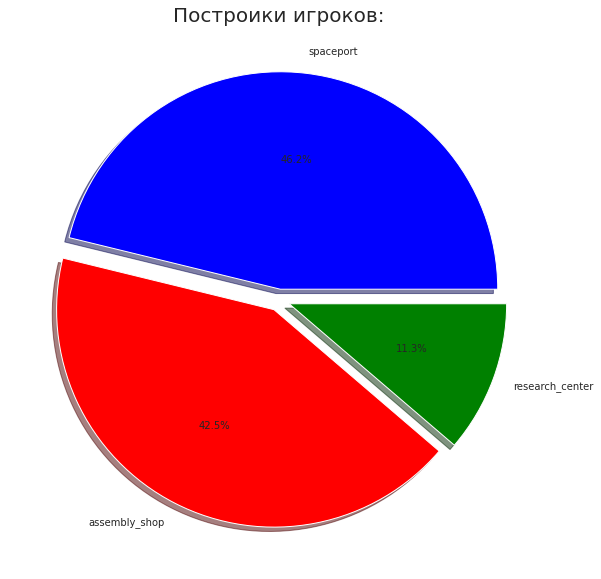

In [31]:
bulding_type(facebook)

**youtube**

Всего построек типа - spaceport: 11624
Всего построек типа - assembly_shop: 10651
Всего построек типа - research_center: 2704


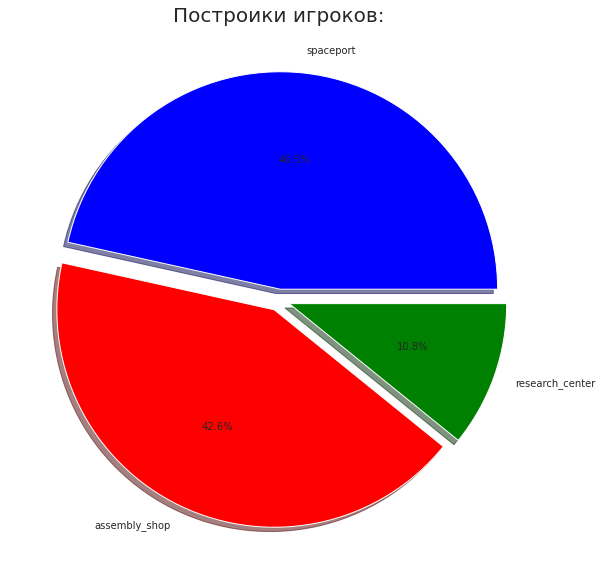

In [32]:
bulding_type(youtube)

В целом процентное отношение построек примерно равное, у игроков привлеченных разными источниками. Так-же больше всего строят космопорты, затем сборочные цеха и меньше всего строят иследовательские центры.

**Когорты игроков**

Раздели игроков на когорты в зависимсости от пути прохлждения первого уровня

In [33]:
events_users = data_game.groupby('user_id')['event'].unique()

In [34]:
def status(rows):
    if rows['event'] == 'project': 
        return 'built_project'
    if rows['event'] == "finished_stage_1": 
        if 'project' in events_users[rows['user_id']]: 
            return 'built_project'
        else:                                           
            return 'defeated_first_player' 
    else:
        return 'in_process'

In [35]:
data_game['progress'] = data_game.apply(lambda x: status(x), axis=1)

display(data_game.head())

print(data_game['progress'].value_counts())
print()
print(data_game['progress'].count())

,event_datetime,event,building_type,user_id,project_type,source,date,week,weekday,hour,progress
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-04,19,Monday,0,in_process
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,facebook_ads,2020-05-04,19,Monday,0,in_process
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,instagram_new_adverts,2020-05-04,19,Monday,0,in_process
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,facebook_ads,2020-05-04,19,Monday,0,in_process
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,yandex_direct,2020-05-04,19,Monday,0,in_process


in_process               127957
defeated_first_player      3951
built_project              3732
Name: progress, dtype: int64

135640


На первый взгляд данные не сходятся, стоит проверить данные по уникальным значениям в столбце "progress"

**Проверим данные:**

In [36]:
pvp_player = data_game[data_game['progress']=='defeated_first_player']['user_id'].nunique() 
pve_player = data_game[data_game['progress']=='built_project']['user_id'].nunique()
print('Прошедшие первый уровень игроки:')
print('PvP игроки:', pvp_player)
print('PvE игроки:', pve_player)
print()
print('Всего прошедших уровень:', pvp_player + pve_player)

Прошедшие первый уровень игроки:
PvP игроки: 3951
PvE игроки: 1866

Всего прошедших уровень: 5817


Все сходится, данные в порядке.

**Подготовим данные и рассмотрим продолжительность игры**

Сгрупируем данные и удалим лишние столбцы:

In [37]:
data_filt = data_game.groupby(['user_id', 'event'])['user_id'].count().unstack(level=1).reset_index()

data_filt = data_filt.drop(columns = ['finished_stage_1', 'project'])

Дополним данные информацией о постройках:

In [38]:
build_count = data_game.groupby(['user_id', 'building_type'])['user_id'].count().unstack(level=1).reset_index()
data_filt = data_filt.merge(build_count, how='left', on='user_id')

Дополним данные источниками:

In [39]:
data_filt = data_filt.merge(user_source, how='left', on='user_id')

Дополним данные первой активностью игрока (игровым действием)

In [40]:
first_activity = data_game.groupby(['user_id']).agg(first_activity = ('event_datetime', 'min')).reset_index()
data_filt = data_filt.merge(first_activity, how='left', on='user_id')

Дополним данные последней активностью игрока (игровым действием)

In [41]:
last_activity = data_game.groupby(['user_id'])['event_datetime'].max().reset_index()
last_activity = last_activity.merge(data_game, how='left', left_on=['user_id', 'event_datetime'], 
                                    right_on=['user_id', 'event_datetime'])

In [42]:
last_activity = last_activity.rename(columns = {'event_datetime':'last_activity'})
last_activity = last_activity.drop(columns = ['event', 'building_type', 'project_type', 'date', 'week', 'hour', 'source'])

In [43]:
data_filt = data_filt.merge(last_activity, how='left', on='user_id')
data_filt.head()

,user_id,building,assembly_shop,research_center,spaceport,source,first_activity,last_activity,weekday,progress
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,13.0,6.0,1.0,6.0,facebook_ads,2020-05-06 01:07:37,2020-05-20 11:26:06,Wednesday,in_process
1,00151b4f-ba38-44a8-a650-d7cf130a0105,9.0,4.0,NaN,5.0,yandex_direct,2020-05-06 03:09:12,2020-05-18 10:46:52,Monday,in_process
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,4.0,2.0,NaN,2.0,youtube_channel_reklama,2020-05-05 18:08:52,2020-05-14 09:21:27,Thursday,in_process
3,001d39dc-366c-4021-9604-6a3b9ff01e25,8.0,4.0,NaN,4.0,instagram_new_adverts,2020-05-05 21:02:05,2020-05-12 07:40:47,Tuesday,defeated_first_player
4,002f508f-67b6-479f-814b-b05f00d4e995,12.0,3.0,1.0,8.0,facebook_ads,2020-05-05 13:49:58,2020-05-22 02:46:45,Friday,in_process


Добавим столбцы с количеством дней и часов, прошедших в период игровой активоности

In [44]:
data_filt['game_time_days'] = (data_filt['last_activity'] - data_filt['first_activity']).astype('timedelta64[D]')
data_filt['game_time_hours'] = (data_filt['last_activity'] - data_filt['first_activity']).astype('timedelta64[h]')

In [45]:
data_filt.head(3)

,user_id,building,assembly_shop,research_center,spaceport,source,first_activity,last_activity,weekday,progress,game_time_days,game_time_hours
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,13.0,6.0,1.0,6.0,facebook_ads,2020-05-06 01:07:37,2020-05-20 11:26:06,Wednesday,in_process,14.0,346.0
1,00151b4f-ba38-44a8-a650-d7cf130a0105,9.0,4.0,NaN,5.0,yandex_direct,2020-05-06 03:09:12,2020-05-18 10:46:52,Monday,in_process,12.0,295.0
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,4.0,2.0,NaN,2.0,youtube_channel_reklama,2020-05-05 18:08:52,2020-05-14 09:21:27,Thursday,in_process,8.0,207.0


**Подготовим функцию для построения графика распределнения**

In [46]:
def distribution(data, par, hue, title):
    plt.figure(figsize=(15,10))
    plt.title(title)
    
    for i in data[hue].unique():
        sns.distplot(data[data[hue] == i][par], label = i)
    plt.legend()
    plt.xlabel('')
    plt.show()
    
    display(data.groupby(hue).agg(par_mean = (par, 'mean'))
                                                    .sort_values('par_mean', ascending=False))

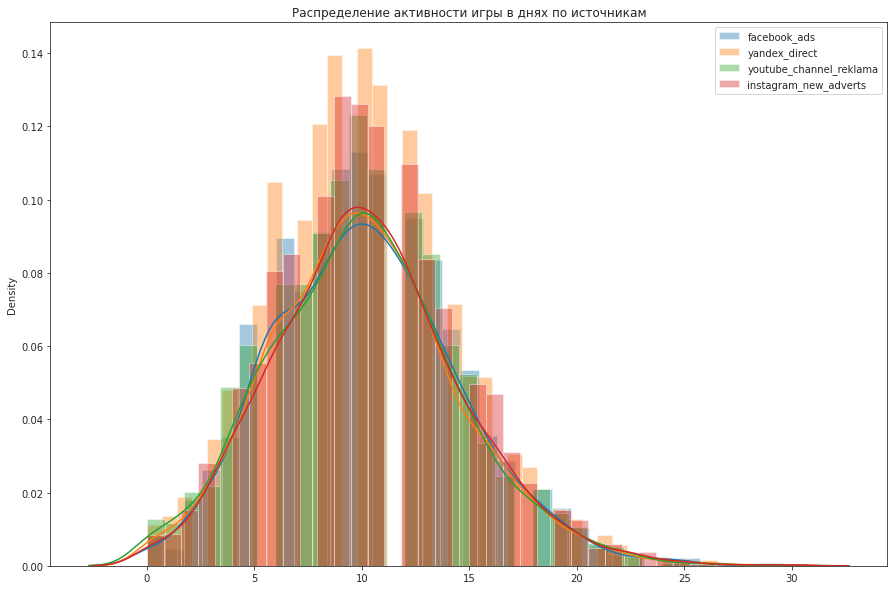

,par_mean
source,
instagram_new_adverts,10.289812
facebook_ads,10.223404
yandex_direct,10.121652
youtube_channel_reklama,10.080045


In [47]:
distribution(data_filt, 'game_time_days', 'source', 'Распределение активности игры в днях по источникам')

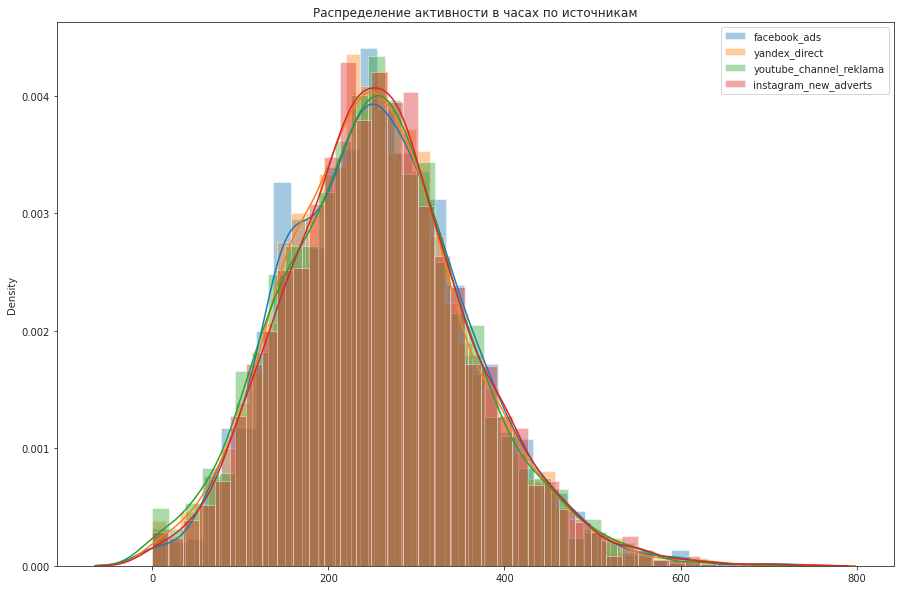

,par_mean
source,
instagram_new_adverts,258.420974
facebook_ads,257.051357
yandex_direct,254.277143
youtube_channel_reklama,253.593075


In [48]:
distribution(data_filt, 'game_time_hours', 'source', 'Распределение активности в часах по источникам')

Среднее время активности игроков привлеченных из разных источников практически не отличяется:
- В среднем активность состовляет 10 дней 
- В среднем активность состовляет от 253 до 258 часов

**Время активности в зависимости пути завершения первого уровня**

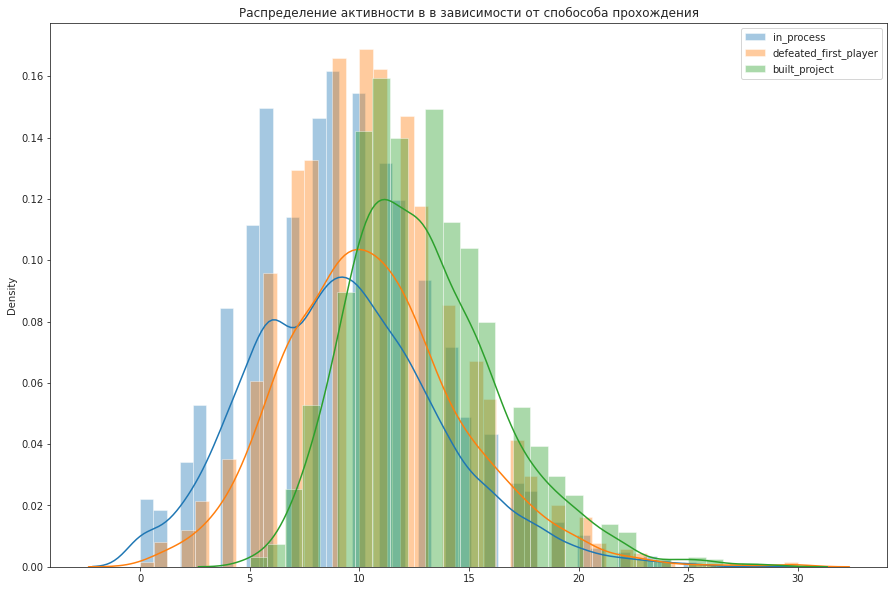

,par_mean
progress,
built_project,12.963023
defeated_first_player,10.606176
in_process,9.285475


In [49]:
distribution(data_filt, 'game_time_days', 'progress', 'Распределение активности в в зависимости от спобособа прохождения')

PvP игроки в среднем быстрее проходят первый уровень, примерное время 11 дней
PvE игроки в среднем завершают прохождение дольше, примерное время 13 дней

Игроки, что не прошли первый уровень в среднем были активны в течении 9 дней

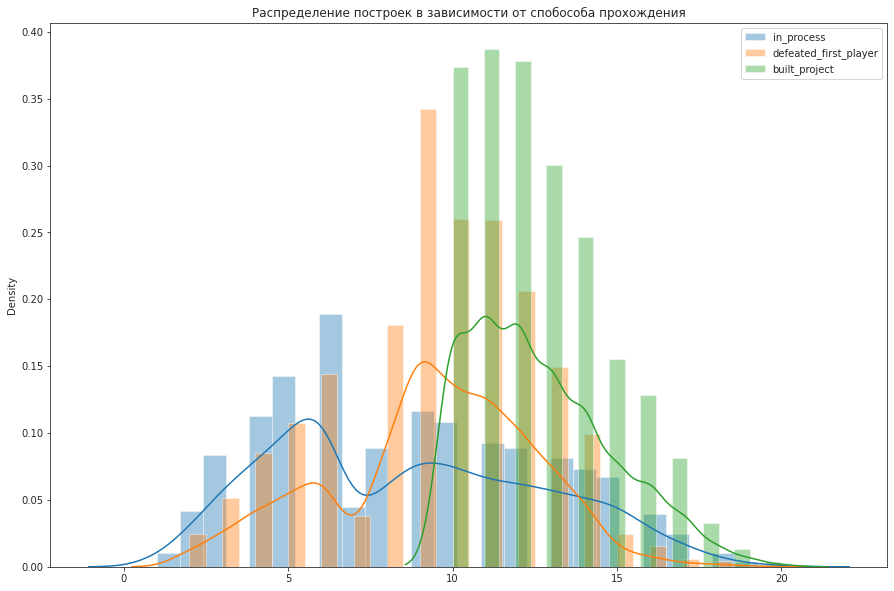

,par_mean
progress,
built_project,12.647910
defeated_first_player,9.411541
in_process,8.657172


In [50]:
distribution(data_filt, 'building', 'progress', 'Распределение построек в зависимости от спобособа прохождения')

Больше всего построек возвели PvE игроки - в среднем 13. PvP игроки в среднем строили 9 построек. Игроки не завершившие первый уровень строили около 8-9 зданий.

**Посмотрим на каждый тип построе по отдельности**

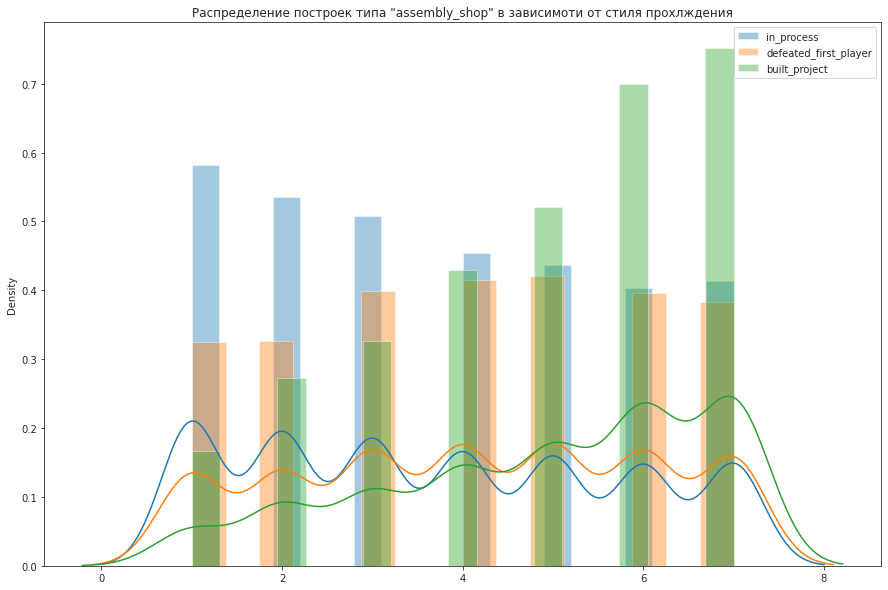

,par_mean
progress,
built_project,4.885316
defeated_first_player,4.125032
in_process,3.747906


In [51]:
distribution(data_filt, 'assembly_shop', 'progress', 'Распределение построек типа "assembly_shop" в зависимоти от стиля прохлждения')

Построики типа - assembly_shop, чаще строили PvE игроки, затем идут PvP игроки, данный тип построек в среднем они строили незначительно меньше, 4.8 у PvE и 4.1 у PvP игроков. У игроков не прошедших первый уровень этот показатель в среднем 3.7.

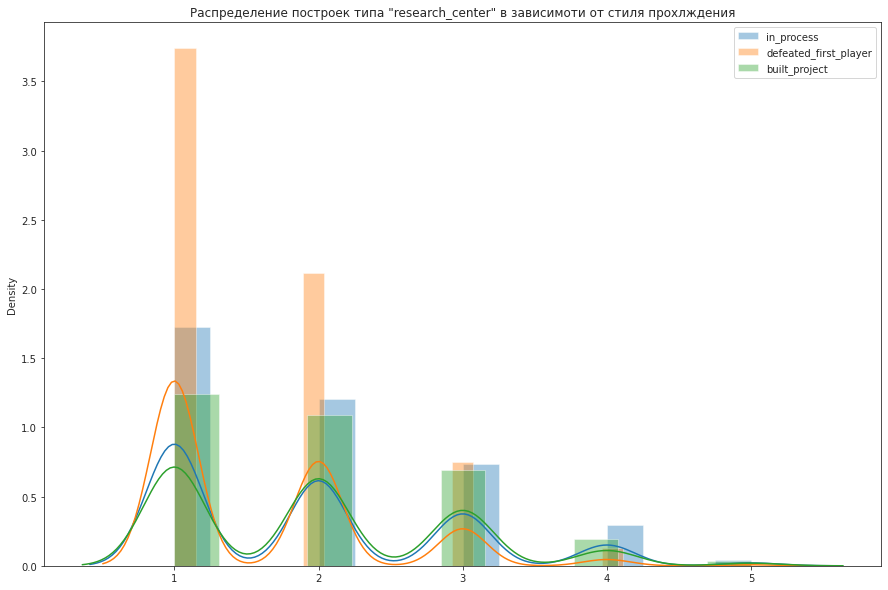

,par_mean
progress,
built_project,1.981243
in_process,1.930696
defeated_first_player,1.603330


In [52]:
distribution(data_filt, 'research_center', 'progress', 'Распределение построек типа "research_center" в зависимоти от стиля прохлждения')

Постройку "research_center" больше всего строили PvE игроки, не завершившие уровень на втором месте, PvP игроки меньше всего строили данный тип постройки, что логично. 

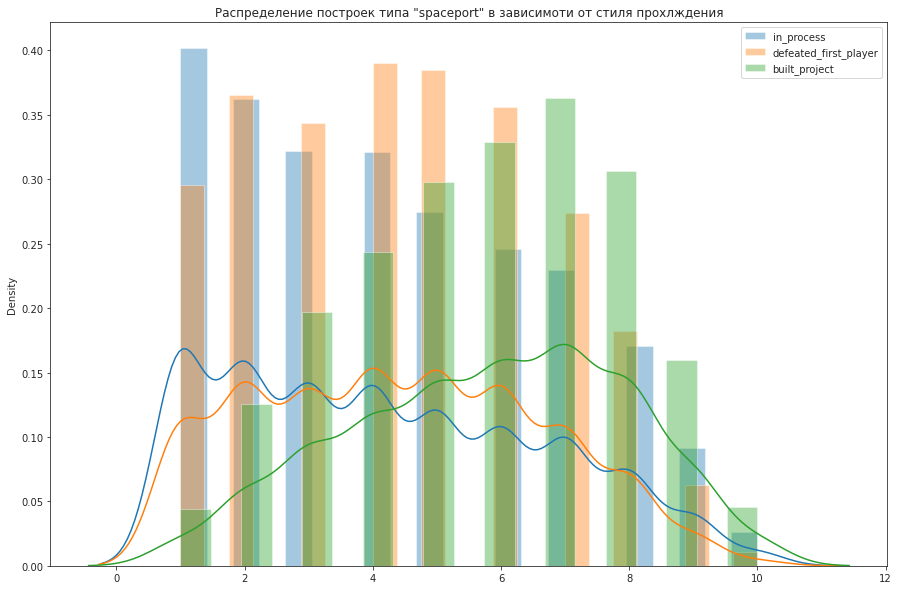

,par_mean
progress,
built_project,5.781350
defeated_first_player,4.399589
in_process,4.203587


In [53]:
distribution(data_filt, 'spaceport', 'progress', 'Распределение построек типа "spaceport" в зависимоти от стиля прохлждения')

"spaceport" чаще возводили, PvE игроки, на втором месте PvP, немногим меньше строили игроки не прошедшие уровень. 

Игроки предпочитающие PvE, строят больше исследовательских центров (research_center), космопортов('spaceport') и меньше сборочных цехов (assembly_shop), чем другие игроки.

**Стоимость привлечения пользователя(CAC)**

Подготовим данные к расчету САС и соединим с таблицей затрат на рекламу по источникам:

In [54]:
data_filt['first_activity'] = data_filt['first_activity'].dt.date
cac = data_filt.groupby(['source', 'first_activity']).agg(users = ('user_id', 'nunique')).reset_index()

ad_costs['date'] = ad_costs['date'].dt.date
ad_costs = ad_costs.merge(cac, left_on = ['source', 'date'], right_on = ['source', 'first_activity'], how='outer').sort_values(by=['source','date'])
ad_costs

,source,date,cost,first_activity,users
0,facebook_ads,2020-05-03,935.882786,NaN,NaN
1,facebook_ads,2020-05-04,548.354480,2020-05-04,1184.0
2,facebook_ads,2020-05-05,260.185754,2020-05-05,694.0
3,facebook_ads,2020-05-06,177.982200,2020-05-06,345.0
4,facebook_ads,2020-05-07,111.766796,2020-05-07,224.0
5,facebook_ads,2020-05-08,68.009276,2020-05-08,139.0
6,facebook_ads,2020-05-09,38.723350,2020-05-09,84.0
28,facebook_ads,NaN,NaN,2020-05-10,56.0
7,instagram_new_adverts,2020-05-03,943.204717,NaN,NaN
8,instagram_new_adverts,2020-05-04,502.925451,2020-05-04,1452.0


Нам доступны данные первых игроков, с 4 по 10 мая включительно, хотя в данных есть и 3 мая, значит нужно сдвинуть значения и удалить пустые строки  

In [55]:
ad_costs['users'] = ad_costs['users'].shift(-1)
ad_costs['first_activity'] = ad_costs['first_activity'].shift(-1)
ad_costs = ad_costs.dropna(axis='index', how='any', subset=['cost'])
ad_costs

,source,date,cost,first_activity,users
0,facebook_ads,2020-05-03,935.882786,2020-05-04,1184.0
1,facebook_ads,2020-05-04,548.354480,2020-05-05,694.0
2,facebook_ads,2020-05-05,260.185754,2020-05-06,345.0
3,facebook_ads,2020-05-06,177.982200,2020-05-07,224.0
4,facebook_ads,2020-05-07,111.766796,2020-05-08,139.0
5,facebook_ads,2020-05-08,68.009276,2020-05-09,84.0
6,facebook_ads,2020-05-09,38.723350,2020-05-10,56.0
7,instagram_new_adverts,2020-05-03,943.204717,2020-05-04,1452.0
8,instagram_new_adverts,2020-05-04,502.925451,2020-05-05,796.0
9,instagram_new_adverts,2020-05-05,313.970984,2020-05-06,472.0


Считаем CAC по сумме и по количеству построеных игроком зданий:

In [56]:
ad_costs['cac'] = ad_costs['cost'] / ad_costs['users']

In [57]:
build = data_filt.groupby(['source', 'first_activity']).agg({'building':'sum'})
ad_costs = ad_costs.merge(build, left_on = ['source', 'first_activity'], right_on = ['source', 'first_activity'], how = 'left')

In [58]:
ad_costs['cac_build'] = ad_costs['building'] / ad_costs['users']

ad_costs

,source,date,cost,first_activity,users,cac,building,cac_build
0,facebook_ads,2020-05-03,935.882786,2020-05-04,1184.0,0.790442,12494.0,10.552365
1,facebook_ads,2020-05-04,548.354480,2020-05-05,694.0,0.790136,6895.0,9.935159
2,facebook_ads,2020-05-05,260.185754,2020-05-06,345.0,0.754162,3087.0,8.947826
3,facebook_ads,2020-05-06,177.982200,2020-05-07,224.0,0.794563,1789.0,7.986607
4,facebook_ads,2020-05-07,111.766796,2020-05-08,139.0,0.804078,949.0,6.827338
5,facebook_ads,2020-05-08,68.009276,2020-05-09,84.0,0.809634,599.0,7.130952
6,facebook_ads,2020-05-09,38.723350,2020-05-10,56.0,0.691488,318.0,5.678571
7,instagram_new_adverts,2020-05-03,943.204717,2020-05-04,1452.0,0.649590,15135.0,10.423554
8,instagram_new_adverts,2020-05-04,502.925451,2020-05-05,796.0,0.631816,7786.0,9.781407
9,instagram_new_adverts,2020-05-05,313.970984,2020-05-06,472.0,0.665193,4221.0,8.942797


Теперь нам доступна информация о затратах на одного пользователя и сколько построек он сделал в первый день игры, что позволит нам в дальнейшем посчитать окупаемость ('в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки')

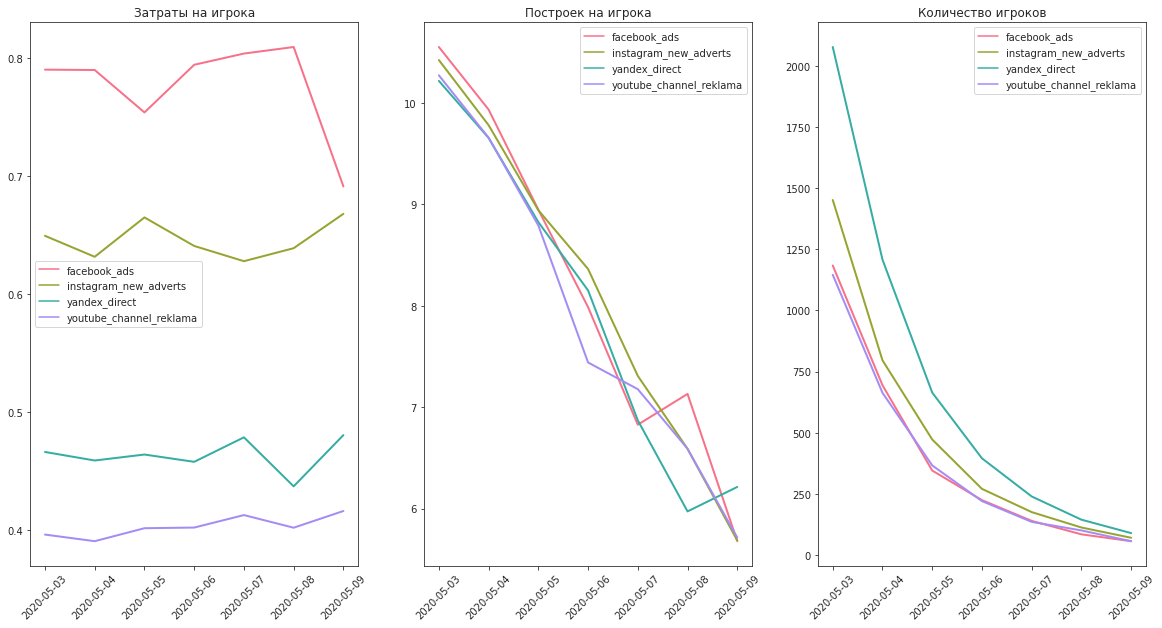

In [59]:
fig, ax = plt.subplots(figsize = (20, 10))
    
sns.lineplot(x='date', y='cac', hue='source', data=ad_costs, palette="husl", linewidth=2, ax=plt.subplot(1, 3, 1))
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
plt.legend()
plt.title('Затраты на игрока')

sns.lineplot(x='date', y='cac_build', hue='source', data=ad_costs, palette="husl", linewidth=2, ax=plt.subplot(1, 3, 2))
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend()
plt.title('Построек на игрока')

sns.lineplot(x='date', y='users', hue='source', data=ad_costs, palette="husl", linewidth=2, ax=plt.subplot(1, 3, 3))
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend()
plt.title('Количество игроков')


sns.set(font_scale=1)
plt.show()

In [60]:
print('Средняя стоимость игрока:')
print()
display(ad_costs.groupby(['source']).agg({'cac':'mean'}).sort_values('cac', ascending=False))
print()
print('Среднее число построек на игрока:')
print()
display(ad_costs.groupby(['source']).agg({'cac_build':'mean'}).sort_values('cac_build', ascending=False))
print()
print('Среднее количество игроков:')
print()
display(ad_costs.groupby(['source']).agg({'users':'mean'}).sort_values('users', ascending=False))

Средняя стоимость игрока:



,cac
source,
facebook_ads,0.776358
instagram_new_adverts,0.646144
yandex_direct,0.463491
youtube_channel_reklama,0.403225



Среднее число построек на игрока:



,cac_build
source,
instagram_new_adverts,8.156327
facebook_ads,8.151260
yandex_direct,7.986689
youtube_channel_reklama,7.949438



Среднее количество игроков:



,users
source,
yandex_direct,688.142857
instagram_new_adverts,478.142857
facebook_ads,389.428571
youtube_channel_reklama,383.714286


Самым дорогим источником привлечения является facebook, несмотря на резкое снижение стоимости под конец наблюдаемого периода, цена все еще остается значительно выше чем у остальных. Учитывая высокую цену и малое количество привлеченых пользователей, facebook не является выгодной рекламной платформой. 

Самымая низкая цена у "youtube", она слегка повышается со временем, но в целом остается равномерной.

Если сопоставить данные по количеству привлеченных игроков и стоймости привлечения, то самым выгодными становиться яндекс директ, он третий по цене и первый по количеству привлеченных игроков. 

В целом игроки независимо от источника привлечения строят прмерно одинаково

# Проверка гипотез

**Зададим уровень статистической значимости:**

In [61]:
alpha = 0.05

**Время завершения уровня различается в зависимости способа прохождения (через реализацию проекта/через победу над первым игроком)**

H0: средняя длительность прохождения уровня в обеих группах одинаковая

H1: средняя длительность прохождения уровня в группах 1 и 2 отличается

In [62]:
pvp_player_time = data_filt[data_filt['progress'] == 'defeated_first_player']['game_time_hours'].reset_index()
pve_player_time = data_filt[data_filt['progress'] == 'built_project']['game_time_hours'].reset_index()

In [63]:
pvalue = st.ttest_ind(pvp_player_time['game_time_hours'].values, pve_player_time['game_time_hours'].values).pvalue

print('p-value: ', pvalue)
if pvalue >= alpha: 
    print('Нулевая гипотеза не отвергается: \033[1mдлительность прохождения уровня в обеих группах одинаковая.\033[0m')
else:
    print('Нулевая гипотеза отвергается: \033[1mдлительность прохождения уровня в группах 1 и 2 отличается.\033[0m')
    
print('PvP игроки:', pvp_player_time['game_time_hours'].mean())
print('PvE игроки:', pve_player_time['game_time_hours'].mean())

p-value:  7.408867041388203e-98
Нулевая гипотеза отвергается: длительность прохождения уровня в группах 1 и 2 отличается.
PvP игроки: 266.0106302201974
PvE игроки: 322.513397642015


Игроки выбравшие путь прохождения через реализацию проекта тратят на прохождения уровня больше времени 

**Количество построек не зависит от способа прохождения уровня**

H0: среднее количество построек одинаково для обоих способов прохождения уровня

H1: среднее количество построек различается по способам прохождения уровня

In [64]:
pvp_player_build = data_filt[data_filt['progress'] == 'defeated_first_player']['building'].values

pve_player_build = data_filt[data_filt['progress'] == 'built_project']['building'].values

In [65]:
pvalue = st.mannwhitneyu(pvp_player_build, pve_player_build)[1]

print('p-value: {}'.format(pvalue))
if pvalue >= alpha: 
    print('Нулевая гипотеза не отвергается: \033[1mсреднее количество построек одинаково для обоих способов прохождения уровня.\033[0m')
else:
    print('Нулевая гипотеза отвергается: \033[1mсреднее количество построек различается по способам прохождения уровня.\033[0m')
    
print('PvP игроки:', round(pvp_player_build.mean(), 2))
print('PvE игроки:', round(pve_player_build.mean(), 2))

p-value: 5.211926275022306e-305
Нулевая гипотеза отвергается: среднее количество построек различается по способам прохождения уровня.
PvP игроки: 9.41
PvE игроки: 12.65


PvE игроки в среднем строят больше объектов, чем те, кто проходит уровень за счёт победы над другим игроком.

# Вывод

В процессе анализа данных было установленно: 

   - Среднее количество игроков в день 2885, минимальное 4, максимальное 9219.
   - Среднее количество событий в день 4110, минимальное 5, максимальное 15208.
   - Среднее количество событий в день на одного игрока 1.33
   
Игроки активны в первую неделю, после чего наблюдается спад активности.   

Время суток практически не влияет на количество игроков и событий, чуть большая активность происходит в утренее(6:00), дневное(6:00) и вечернее(23:00) время

**Игроки**

Всего первый уровень завершили - 5817 игроков из них:
- путем реализации проекта (PvE) - 1866
- путем победы над другим игроком (PvP) - 3951

Стиль прохождения не зависит от источника привлечения.

Больше всего было построено spaceport, затем assembly_shop и research_center. 

PvE игроки чаще строили чем остальные в целом и по отдельности, данный тип игроков занимает первое место по количеству построек в каждом виде.

Средняя продолжительность игры состовляет 10 дней и не зависит от источника привлечения

Согласно построенным графикам САС, количеству построек на игрока и количеству привлеченных игроков:
- самым дорогим источником привлечения является facebook, а самымая низкая цена у "youtube"
- больше всего пользователей привлечено яндекс директ, а facebook привлек наименьшее число пользователей 
- игроки независимо от источника привлечения строят примерно с одинаковой частотой, но в средне игроки пришедшие из instagram и facebook строят чуть больше.

**Вывод о результате проверки гипотез:**

Медианная длительность прохождения уровня отличается в зависимости от стратегии прохождения уровня.

**PvE игроки, проходят уровень дольше.**

Среднее количество построек различается по способам прохождения уровня.

**PvE игроки, в среднем строят больше объектов, чем PvP игроки.**

# Рекомендации

С точки срезения рекламных источников, игроки строят паримерно одинаково, немного выделюятся только facebook и instagram, но CAC по данным источникам высок, а количество привлеченных игроков оставляет желать лучшего. Если отталкиваться от САС, то интереснее выглядит Яндекс.Директ, он привлекает большое число игроков, за хорошую цену. Можно обратить внимание на youtube, цена привлечения игрока самая низкая из всех, стоит пересмотреть рекламную компанию для увелечения количества привлеченных игроков или же увеличить показ рекламы. Таким образом, для дальнейшего развития стоит сделать акцент на Яндекс.Директ и youtube, как на источники привлечения игроков.

Согласно предварительной модели монетизации , выручка с клиента зависит от количества построек. Выгоднее PvE игроки, так как они больше всех строят. 

Можно изменить баланс в игре, чтобы игрокам приходилось строить больше, но нужно не переборщить с этим, данный вопрос достоин отдельного иследования.